In [1]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [3]:
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
matplotlib.rc('font', family=font_prop)

Malgun Gothic


In [4]:
import pandas as pd  # pandas 라이브러리 임포트

# 정확한 경로를 raw string으로 지정
file_path = r"C:\Users\user\Desktop\data analysis\data\인구현황.csv"

# CSV 파일을 DataFrame으로 읽기
df_all = pd.read_csv(file_path)

# 상위 5개 행 출력
print(df_all.head())

       행정기관코드   행정기관      총인구수       세대수  세대당 인구    남자 인구수    여자 인구수  남여 비율
0  1000000000     전국  51217221  24118928    2.12  25498324  25718897   0.99
1  1100000000  서울특별시   9331828   4482063    2.08   4505355   4826473   0.93
2  2600000000  부산광역시   3266598   1570403    2.08   1589912   1676686   0.95
3  2700000000  대구광역시   2363629   1104130    2.14   1159601   1204028   0.96
4  2800000000  인천광역시   3021010   1373827    2.20   1509243   1511767   1.00


In [5]:
# 전국 데이터는 제거하고 새로운 DataFrame 생성, 변수명은 df
df = df_all.loc[df_all['행정기관'] != '전국'].copy()
df.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00
5,2900000000,광주광역시,1408422,658075,2.14,695224,713198,0.97


In [6]:
print("\n결측치 확인:")
print(df.isnull().sum())


결측치 확인:
행정기관코드    0
행정기관      0
총인구수      0
세대수       0
세대당 인구    0
남자 인구수    0
여자 인구수    0
남여 비율     0
dtype: int64


##### 1. 지역별 총인구수 Top5


In [7]:
# 원본 데이터프레임에서 전국 제외 및 정렬
df_filtered = df[df['행정기관'] != '전국']
top5_total_pop = df_filtered.sort_values(by='총인구수', ascending=False).head(5)

# 결과 DataFrame 생성 (필요한 컬럼만 선택)
result_df = top5_total_pop[['행정기관', '총인구수']].copy()

# 천 단위 구분 포맷 적용 (옵션)
result_df['총인구수'] = result_df['총인구수'].apply(lambda x: f"{x:,}")

# 출력
print("1. 지역별 총인구수 Top5\n")
display(result_df)


1. 지역별 총인구수 Top5



,행정기관,총인구수
9,경기도,"13,694,685"
1,서울특별시,"9,331,828"
2,부산광역시,"3,266,598"
16,경상남도,"3,228,380"
4,인천광역시,"3,021,010"


##### 1-1. 지역별 총인구수 Plot

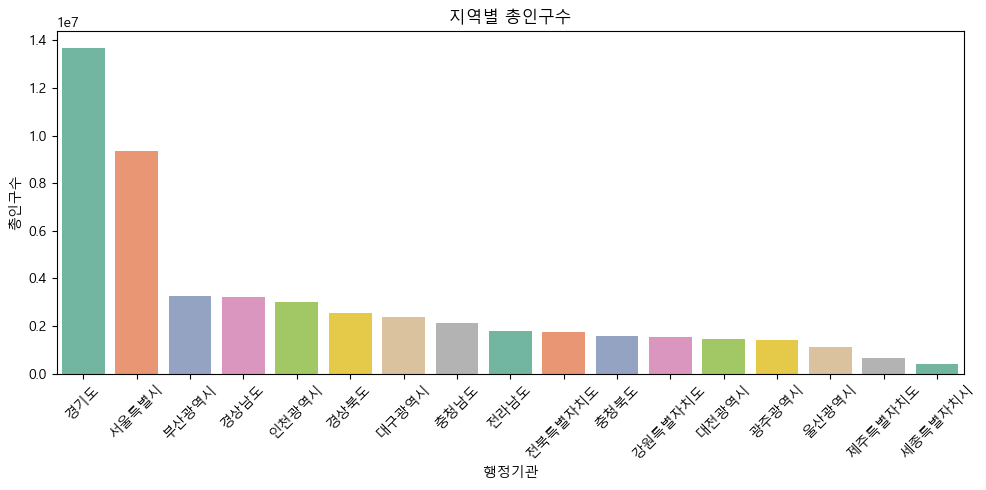

In [8]:

# 총인구수 기준 내림차순 정렬 후 상위 5개 행 추출
top5_total_pop = df.sort_values(by='총인구수', ascending=False)

# 시각화
plt.figure(figsize=(10, 5))  # 그래프 크기 먼저 설정
sns.barplot(x='행정기관', y='총인구수', data=top5_total_pop, palette='Set2', hue='행정기관')

plt.xticks(rotation=45)
plt.title('지역별 총인구수')
plt.tight_layout()
plt.show()


##### 2. 세대당 인구수 높은 지역 Top5

In [9]:

#  원본 데이터프레임에서 '전국' 제외
df_filtered = df[df['행정기관'] != '전국'].copy()

#  세대당 인구수 계산 및 정렬
df_filtered['세대당 인구수'] = df_filtered['총인구수'] / df_filtered['세대수']
top5_df = df_filtered.sort_values('세대당 인구수', ascending=False).head(5)

#  필요한 컬럼만 선택하고 소수점 2자리로 포맷팅
result_df = top5_df[['행정기관', '세대당 인구수']].round(2)


#  결과 출력
display(result_df)

,행정기관,세대당 인구수
8,세종특별자치시,2.39
9,경기도,2.26
7,울산광역시,2.22
4,인천광역시,2.20
3,대구광역시,2.14


##### 2-1. 지역별 세대당 인구 Plot

C:\Users\user\AppData\Local\Temp\ipykernel_23248\1262272363.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='행정기관', y='세대당 인구수', data=result_df, palette='viridis')


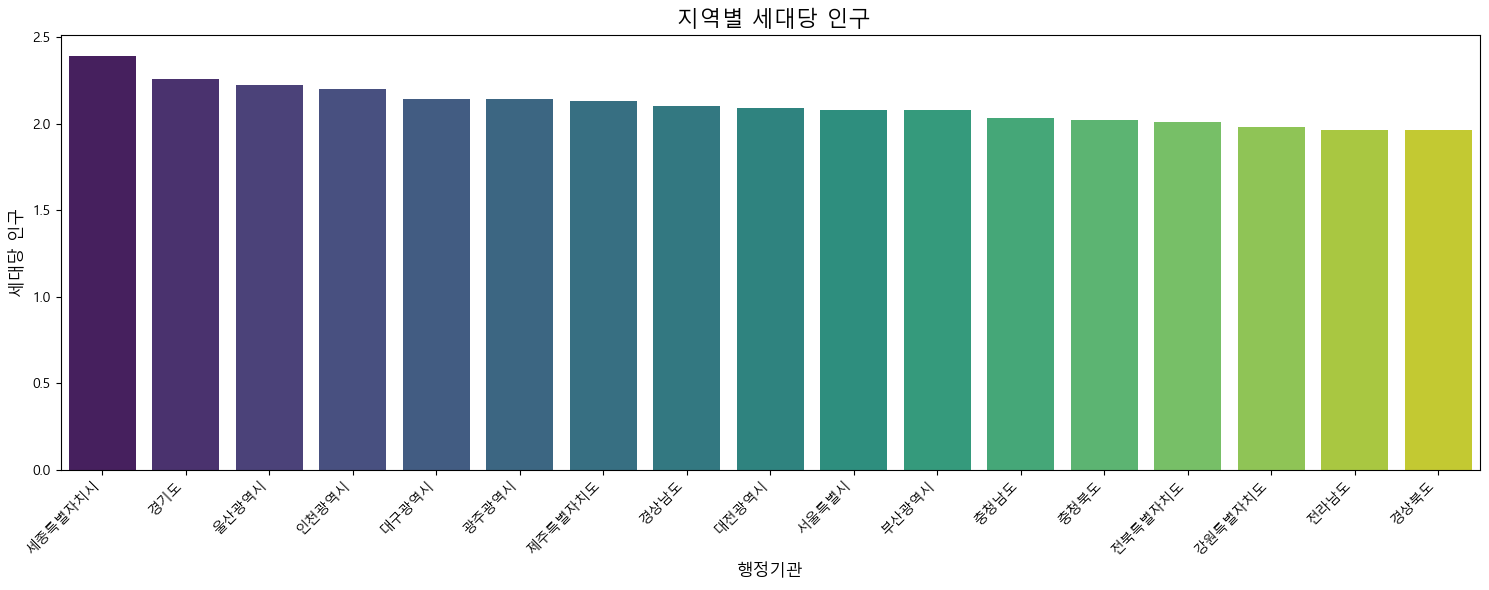

In [10]:
#  '전국' 제외한 전체 지역 데이터 준비
df_filtered = df[df['행정기관'] != '전국'].copy()

#  세대당 인구수 계산
df_filtered['세대당 인구수'] = df_filtered['총인구수'] / df_filtered['세대수']

#  인구수 기준 정렬 
df_filtered = df_filtered.sort_values('세대당 인구수', ascending=False)

#  결과 정리
result_df = df_filtered[['행정기관', '세대당 인구수']].round(2).reset_index(drop=True)

#  그래프 출력
plt.figure(figsize=(max(15, len(result_df) * 0.4), 6))  # 지역 수에 따라 가로 크기 자동 조절

sns.barplot(x='행정기관', y='세대당 인구수', data=result_df, palette='viridis')

plt.title(" 지역별 세대당 인구", fontsize=16)
plt.xlabel("행정기관", fontsize=12)
plt.ylabel("세대당 인구", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



##### 3. 남녀 비율 분석

In [11]:
#  '전국' 제외
df_filtered = df[df['행정기관'] != '전국'].copy()

#  남자 비율과 여자 비율 계산 (여자 인구수를 기준으로 남성 대비 비율 계산)
df_filtered['남녀 비율'] = (df_filtered['남자 인구수'] / df_filtered['여자 인구수']).round(2)

#  결과 정렬 
result_df = df_filtered[['행정기관', '남녀 비율']].sort_values('남녀 비율', ascending=False).reset_index(drop=True)

#  결과 출력
display(result_df)


,행정기관,남녀 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


##### 3-1. 지역별 남녀 비율 Plot
* 기준이 되는 빨간선은 pyplot의 axhline() 함수를 사용해 보세요.

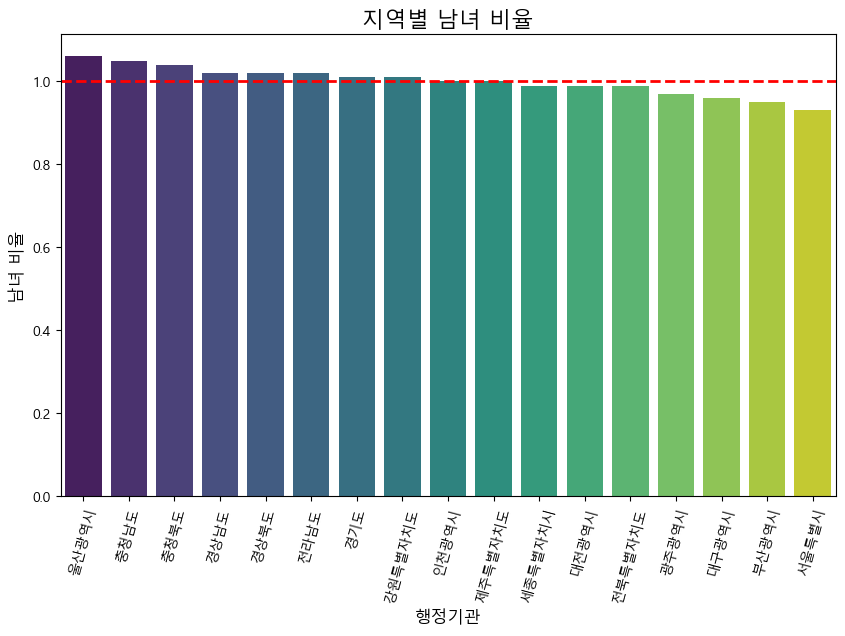

In [12]:
# 남녀 비율 기준으로 내림차순 정렬
result_df_sorted = result_df.sort_values('남녀 비율', ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(10,6))
sns.barplot(x='행정기관', y='남녀 비율', data=result_df_sorted, palette='viridis', hue='행정기관')

# 기준선 추가
plt.axhline(y=1, color='red', linestyle='--', linewidth=2)

# 제목과 레이블 추가
plt.title("지역별 남녀 비율", fontsize=16)
plt.xlabel("행정기관", fontsize=12)
plt.ylabel("남녀 비율", fontsize=12)

# x축 레이블 회전
plt.xticks(rotation=75) 

# 그래프 출력
plt.show()


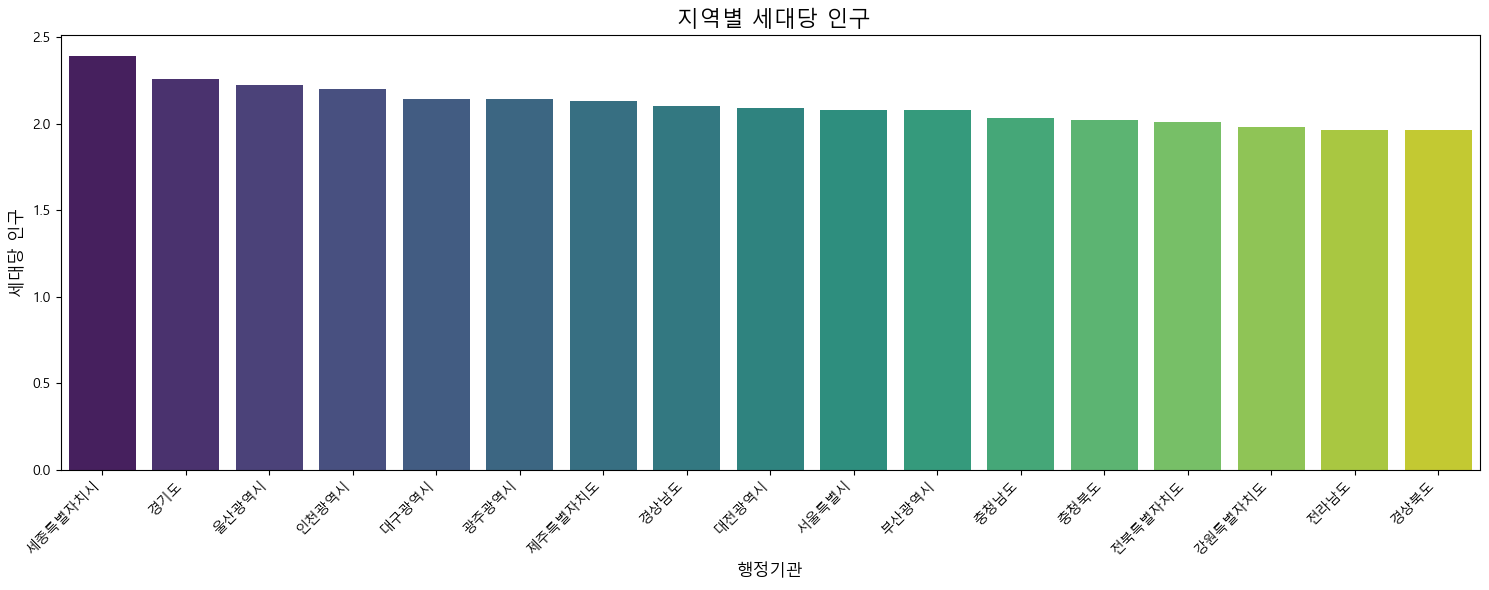

In [17]:
#  '전국' 제외한 전체 지역 데이터 준비
df_filtered = df[df['행정기관'] != '전국'].copy()

#  세대당 인구수 계산
df_filtered['세대당 인구수'] = df_filtered['총인구수'] / df_filtered['세대수']

#  인구수 기준 정렬 
df_filtered = df_filtered.sort_values('세대당 인구수', ascending=False)

#  결과 정리
result_df = df_filtered[['행정기관', '세대당 인구수']].round(2).reset_index(drop=True)

#  그래프 출력
plt.figure(figsize=(max(15, len(result_df) * 0.4), 6))  # 지역 수에 따라 가로 크기 자동 조절

sns.barplot(x='행정기관', y='세대당 인구수', data=result_df, palette='viridis', hue='행정기관', legend=False)


plt.title(" 지역별 세대당 인구", fontsize=16)
plt.xlabel("행정기관", fontsize=12)
plt.ylabel("세대당 인구", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



##### 4. 남자초과 / 여자초과 분석
* 남초(남자초과) => 남자 인구가 여자 인구보다 많은 지역	남여 비율 > 1 또는 남자 인구수 > 여자 인구수
* 여초(여자초과) => 여자 인구가 남자 인구보다 많은 지역	남여 비율 < 1 또는 여자 인구수 > 남자 인구수

* 남초여초 컬럼을 추가합니다. 

In [14]:
print("4. 남초 vs 여초 지역 구분")

#  '전국' 제외
df_filtered = df[df['행정기관'] != '전국'].copy()

#  남녀 비율 계산
df_filtered['남녀 비율'] = (df_filtered['남자 인구수'] / df_filtered['여자 인구수']).round(2)

#  남초/여초 컬럼 추가
df_filtered['남초여초'] = df_filtered['남녀 비율'].apply(lambda x: '남초' if x > 1 else ('여초' if x < 1 else '균형'))

#  결과 출력
result_df = df_filtered[['행정기관', '남녀 비율', '남초여초']].reset_index(drop=True)

#  결과 출력
display(result_df)

4. 남초 vs 여초 지역 구분


,행정기관,남녀 비율,남초여초
0,서울특별시,0.93,여초
1,부산광역시,0.95,여초
2,대구광역시,0.96,여초
3,인천광역시,1.00,균형
4,광주광역시,0.97,여초
5,대전광역시,0.99,여초
6,울산광역시,1.06,남초
7,세종특별자치시,0.99,여초
8,경기도,1.01,남초
9,강원특별자치도,1.01,남초


##### 5. 세대당 인구 평균보다 높은 지역

In [15]:
print("5. 세대당 인구 평균보다 높은 지역")
# 1. '전국' 제외
df_filtered = df[df['행정기관'] != '전국'].copy()

# 2. 세대당 인구수 계산
df_filtered['세대당 인구수'] = df_filtered['총인구수'] / df_filtered['세대수']

# 3. 세대당 인구수 평균 계산
average_population_per_household = df_filtered['세대당 인구수'].mean()

# 4. 세대당 인구수가 평균보다 높은 지역 필터링
above_average_df = df_filtered[df_filtered['세대당 인구수'] > average_population_per_household]

# 5. 결과 출력
display(above_average_df[['행정기관', '세대당 인구수']])


5. 세대당 인구 평균보다 높은 지역


,행정기관,세대당 인구수
3,대구광역시,2.140716
4,인천광역시,2.198974
5,광주광역시,2.140215
7,울산광역시,2.216588
8,세종특별자치시,2.390505
9,경기도,2.260520
17,제주특별자치도,2.129085


##### 5-1. 남초 vs 여초 개수 Plot  /  지역별 세대수 Plot

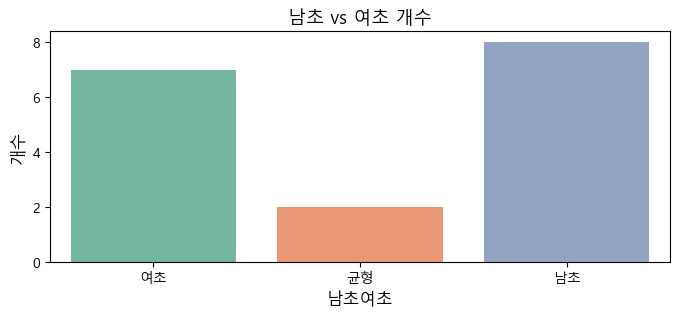

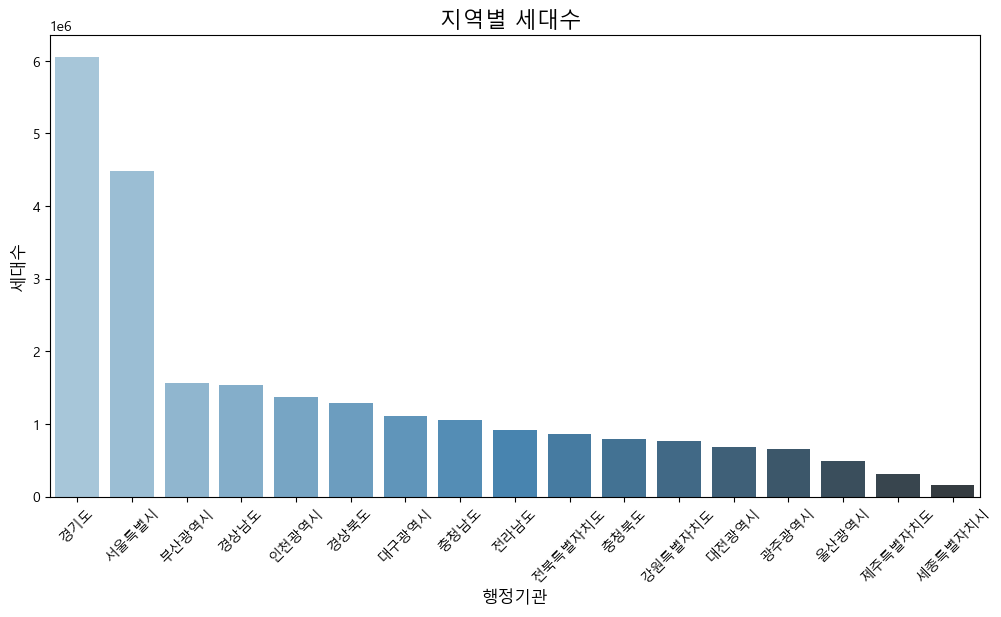

In [16]:


#  남녀 비율 계산 및 남초/여초 컬럼 추가
df_filtered['남녀 비율'] = (df_filtered['남자 인구수'] / df_filtered['여자 인구수']).round(2)
df_filtered['남초여초'] = df_filtered['남녀 비율'].apply(lambda x: '남초' if x > 1 else ('여초' if x < 1 else '균형'))

#  남초 vs 여초 개수 Plot
plt.figure(figsize=(8, 3))
sns.countplot(x='남초여초', data=df_filtered, palette='Set2', hue='남초여초')
plt.title("남초 vs 여초 개수", fontsize=13)
plt.xlabel("남초여초", fontsize=12)
plt.ylabel("개수", fontsize=12)
plt.show()

# 세대수 기준으로 내림차순 정렬
df_sorted = df_filtered.sort_values('세대수', ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(12, 6))
sns.barplot(x='행정기관', y='세대수', data=df_sorted, palette='Blues_d', hue='행정기관')

# 제목과 레이블 추가
plt.title("지역별 세대수 ", fontsize=16)
plt.xlabel("행정기관", fontsize=12)
plt.ylabel("세대수", fontsize=12)
plt.xticks(rotation=45)
# 그래프 출력
plt.show()